Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [ ]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pulsedb-balanced-training-and-testing' dataset.
Path to dataset files: /kaggle/input/pulsedb-balanced-training-and-testing


In [ ]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Mounted at /content/drive
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [2]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

!cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

MemTotal:       87528536 kB
MemFree:        82270916 kB
MemAvailable:   85318460 kB
Buffers:          197672 kB
Cached:          3483332 kB
SwapCached:            0 kB
Active:           642164 kB
Inactive:        3999660 kB
Active(anon):       1424 kB
Inactive(anon):   961428 kB
Active(file):     640740 kB
Inactive(file):  3038232 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              8524 kB
Writeback:             0 kB
AnonPages:        960972 kB
Mapped:           485048 kB
Shmem:              2020 kB
KReclaimable:     231348 kB
Slab:             307372 kB
SReclaimable:     231348 kB
SUnreclaim:        76024 kB
KernelStack:       10080 kB
PageTables:        20004 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    43764268 kB
Committed_AS:    4848352 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       98536 kB
VmallocChunk:    

In [3]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [4]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


Number of Men 21880 Number of Women 29840


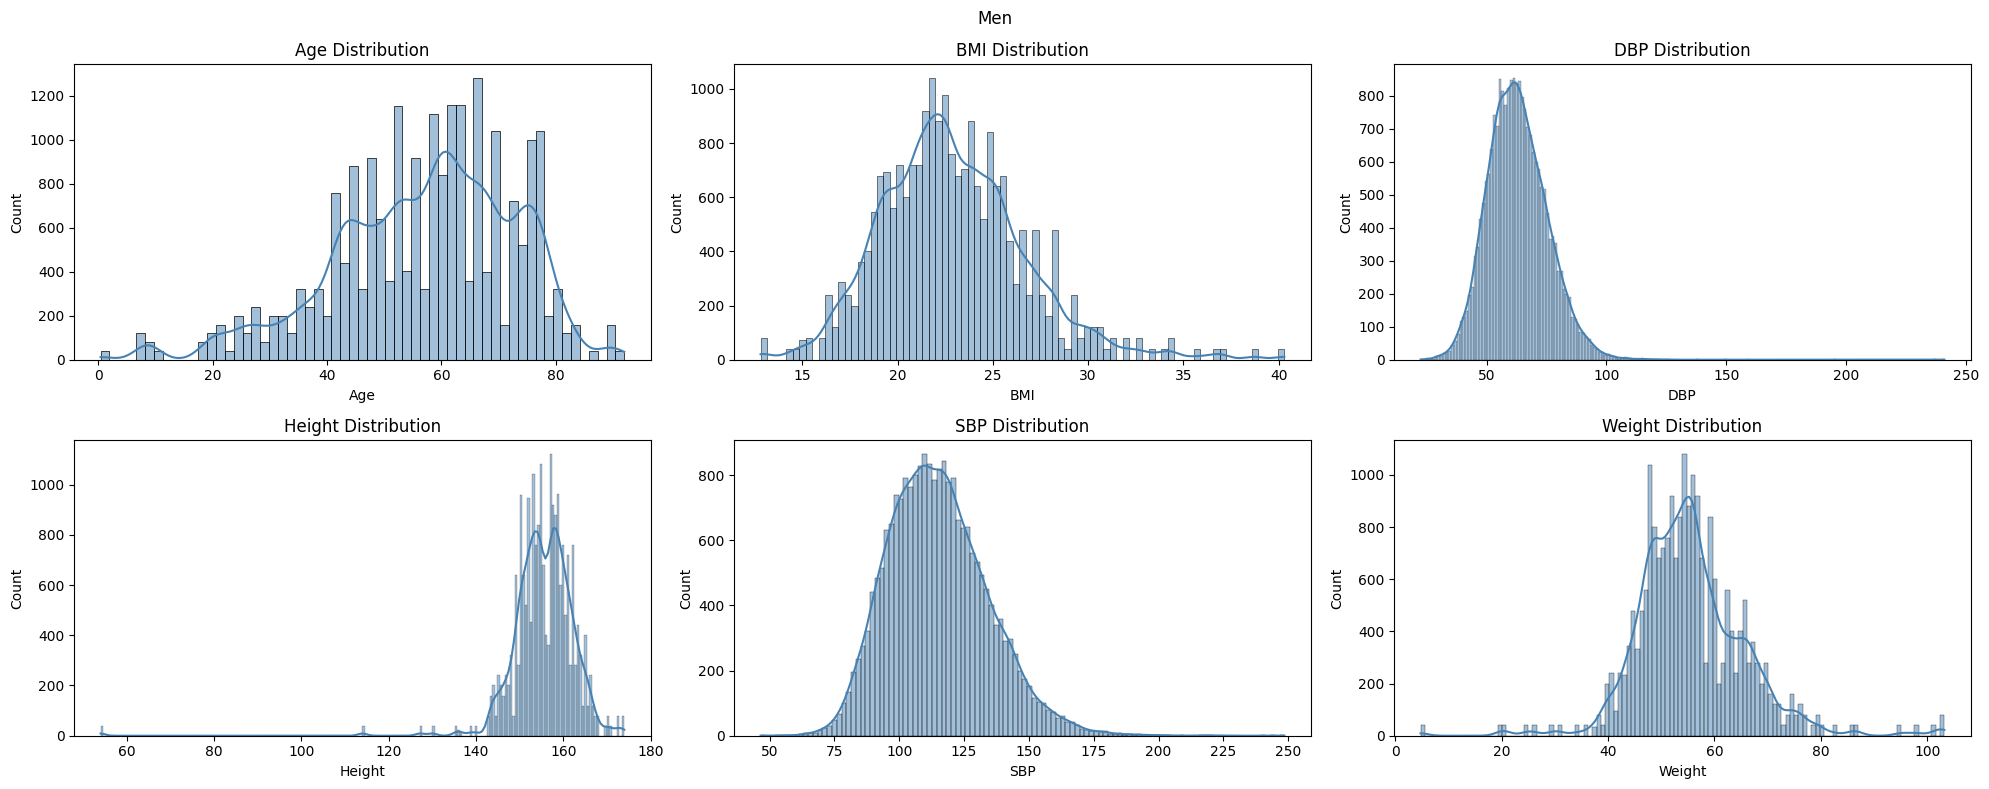

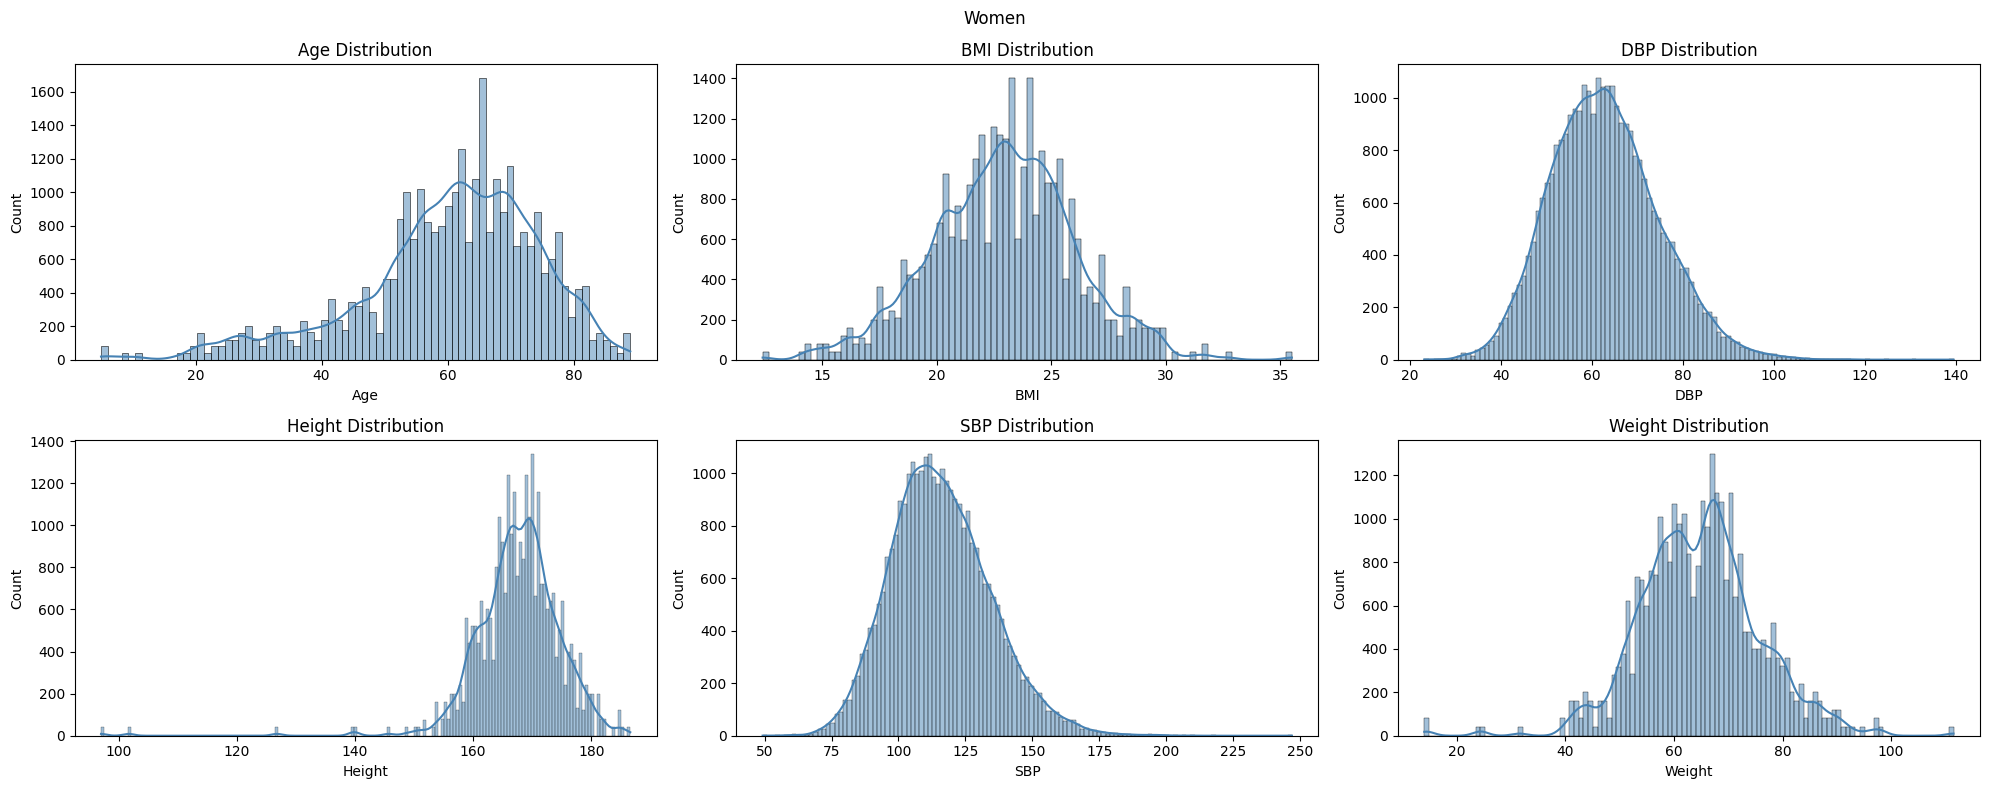

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dfm = df_CalBased_Test[df_CalBased_Test['Gender'] == 0]
dff = df_CalBased_Test[df_CalBased_Test['Gender'] != 0]

print("Number of Men", len(dfm), "Number of Women", len(dff))

fig, ax = plt.subplots(2, 3, figsize=(20, 8))

fig.suptitle("Men")

sns.histplot(dfm['Age'], kde=True, color='steelblue', ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Count")

sns.histplot(dfm['BMI'], kde=True, color='steelblue', ax=ax[0, 1])
ax[0, 1].set_title("BMI Distribution")
ax[0, 1].set_xlabel("BMI")
ax[0, 1].set_ylabel("Count")

sns.histplot(dfm['DBP'], kde=True, color='steelblue', ax=ax[0, 2])
ax[0, 2].set_title("DBP Distribution")
ax[0, 2].set_xlabel("DBP")
ax[0, 2].set_ylabel("Count")

sns.histplot(dfm['Height'], kde=True, color='steelblue', ax=ax[1, 0])
ax[1, 0].set_title("Height Distribution")
ax[1, 0].set_xlabel("Height")
ax[1, 0].set_ylabel("Count")

sns.histplot(dfm['SBP'], kde=True, color='steelblue', ax=ax[1, 1])
ax[1, 1].set_title("SBP Distribution")
ax[1, 1].set_xlabel("SBP")
ax[1, 1].set_ylabel("Count")

sns.histplot(dfm['Weight'], kde=True, color='steelblue', ax=ax[1, 2])
ax[1, 2].set_title("Weight Distribution")
ax[1, 2].set_xlabel("Weight")
ax[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(2, 3, figsize=(20, 8))

fig.suptitle("Women")

sns.histplot(dff['Age'], kde=True, color='steelblue', ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Count")

sns.histplot(dff['BMI'], kde=True, color='steelblue', ax=ax[0, 1])
ax[0, 1].set_title("BMI Distribution")
ax[0, 1].set_xlabel("BMI")
ax[0, 1].set_ylabel("Count")

sns.histplot(dff['DBP'], kde=True, color='steelblue', ax=ax[0, 2])
ax[0, 2].set_title("DBP Distribution")
ax[0, 2].set_xlabel("DBP")
ax[0, 2].set_ylabel("Count")

sns.histplot(dff['Height'], kde=True, color='steelblue', ax=ax[1, 0])
ax[1, 0].set_title("Height Distribution")
ax[1, 0].set_xlabel("Height")
ax[1, 0].set_ylabel("Count")

sns.histplot(dff['SBP'], kde=True, color='steelblue', ax=ax[1, 1])
ax[1, 1].set_title("SBP Distribution")
ax[1, 1].set_xlabel("SBP")
ax[1, 1].set_ylabel("Count")

sns.histplot(dff['Weight'], kde=True, color='steelblue', ax=ax[1, 2])
ax[1, 2].set_title("Weight Distribution")
ax[1, 2].set_xlabel("Weight")
ax[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()


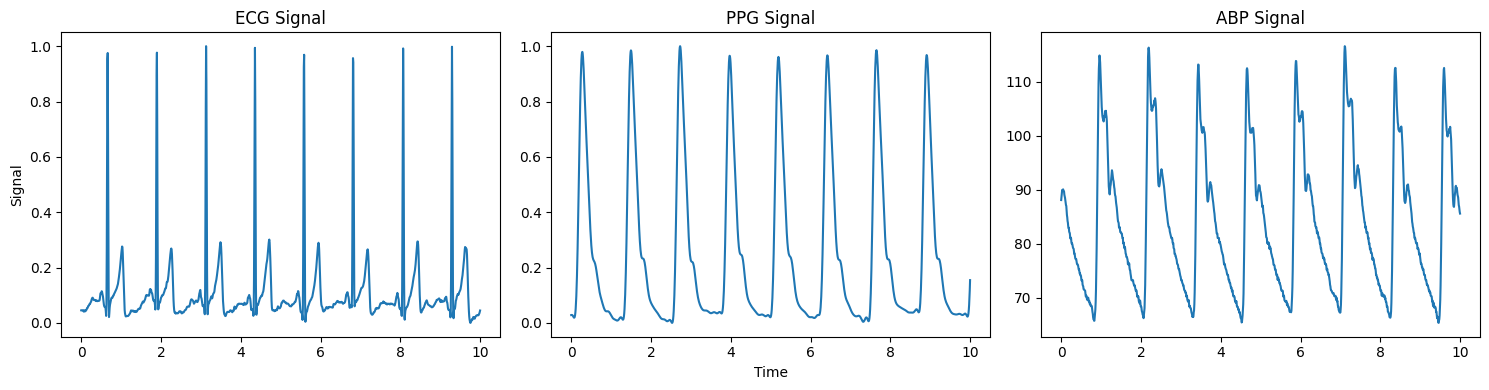

In [ ]:
import matplotlib.pyplot as plt

ecg = ECG_CalBased_Test
ppg = PPG_CalBased_Test
abp = ABP_CalBased_Test

#ECG is 51720 x 1250

sampling_rate = 125
time_per_segment = 10
num_samples_per_segment = 1250

time = np.linspace(0, time_per_segment, num_samples_per_segment)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].plot(time, ecg[2])
ax[0].set_title('ECG Signal')
ax[0].set_ylabel('Signal')

ax[1].plot(time, ppg[2])
ax[1].set_title('PPG Signal')
ax[1].set_xlabel('Time')

ax[2].plot(time, abp[2])
ax[2].set_title('ABP Signal')

plt.tight_layout()
plt.show()

#2. Blood Pressure Prediction


In [13]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# =========================
# DATASET
# =========================

SBP_Train = ABP_Train.max(axis=1)
DBP_Train = ABP_Train.min(axis=1)

SBP_Test  = ABP_CalBased_Test.max(axis=1)
DBP_Test  = ABP_CalBased_Test.min(axis=1)

X_train = np.concatenate([ECG_Train, PPG_Train], axis=1)
X_test  = np.concatenate([ECG_CalBased_Test, PPG_CalBased_Test], axis=1)

y_train_SBP = SBP_Train
y_train_DBP = DBP_Train

y_test_SBP = SBP_Test
y_test_DBP = DBP_Test

# ============================================================
# MODEL
# ============================================================
def train_sgd_with_progress(X, y, epochs=500, lr=0.001, desc="Training"):
    reg = SGDRegressor(
        max_iter=1,
        tol=None,
        warm_start=True,
        learning_rate='constant',
        eta0=lr
    )
    for _ in tqdm(range(epochs), desc=desc):
        reg.fit(X, y)
    return reg

# ============================================================
# TRAINING
# ============================================================
num_epochs = 1

reg_SBP = train_sgd_with_progress(X_train, y_train_SBP, epochs=num_epochs, lr=0.001, desc="Training SBP")
reg_DBP = train_sgd_with_progress(X_train, y_train_DBP, epochs=num_epochs, lr=0.001, desc="Training DBP")

# ============================================================
# TESTING
# ============================================================
sbp_pred = reg_SBP.predict(X_test)
dbp_pred = reg_DBP.predict(X_test)

sbp_true = y_test_SBP
dbp_true = y_test_DBP

# ============================================================
# EVALUATION
# ============================================================
def compute_metrics(y_true, y_pred):
    ME  = np.mean(y_pred - y_true)
    SDE = np.std(y_pred - y_true)
    MAE = mean_absolute_error(y_true, y_pred)
    R2  = r2_score(y_true, y_pred)
    return ME, SDE, MAE, R2

sbp_ME, sbp_SDE, sbp_MAE, sbp_R2 = compute_metrics(sbp_true, sbp_pred)
dbp_ME, dbp_SDE, dbp_MAE, dbp_R2 = compute_metrics(dbp_true, dbp_pred)

Training DBP: 100%|██████████| 1/1 [00:17<00:00, 17.81s/it]


SBP Metrics:
 ME = -8.580 mmHg
 SDE = 20.038 mmHg
 MAE = 16.794 mmHg
 R² = -0.228

DBP Metrics:
 ME = -0.575 mmHg
 SDE = 12.752 mmHg
 MAE = 9.667 mmHg
 R² = -0.010


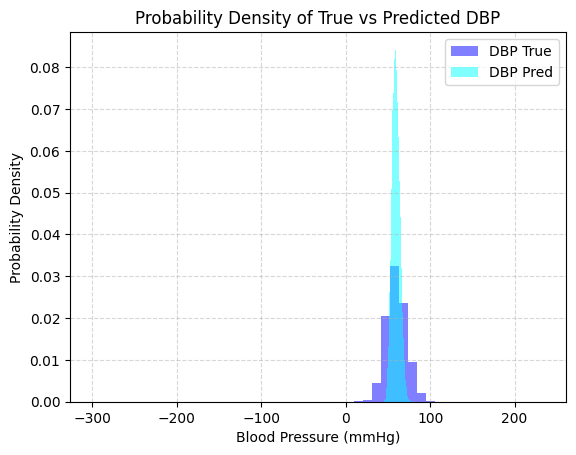

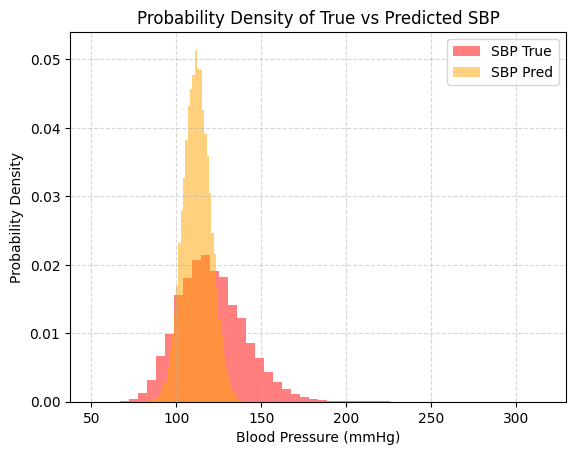

In [14]:
# ============================================================
# IMPORTS
# ============================================================

import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# ============================================================
# METRICS
# ============================================================

print("SBP Metrics:")
print(f" ME = {sbp_ME:.3f} mmHg")
print(f" SDE = {sbp_SDE:.3f} mmHg")
print(f" MAE = {sbp_MAE:.3f} mmHg")
print(f" R² = {sbp_R2:.3f}")

print("\nDBP Metrics:")
print(f" ME = {dbp_ME:.3f} mmHg")
print(f" SDE = {dbp_SDE:.3f} mmHg")
print(f" MAE = {dbp_MAE:.3f} mmHg")
print(f" R² = {dbp_R2:.3f}")

# ============================================================
# HISTOGRAMS
# ============================================================

plt.figure()
plt.hist(dbp_true, bins=50, density=True, alpha=0.5, label='DBP True', color='blue')
plt.hist(dbp_pred, bins=50, density=True, alpha=0.5, label='DBP Pred', color='cyan')
plt.title('Probability Density of True vs Predicted DBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure()
plt.hist(sbp_true, bins=50, density=True, alpha=0.5, label='SBP True', color='red')
plt.hist(sbp_pred, bins=50, density=True, alpha=0.5, label='SBP Pred', color='orange')
plt.title('Probability Density of True vs Predicted SBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [5]:
# ============================================================
# IMPORTS
# ============================================================

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.amp import autocast, GradScaler

# ============================================================
# DATASET
# ============================================================

class PulseDBDataset(Dataset):
    def __init__(self, ecg, ppg, sbp, dbp, normalize=True):
        self.ecg = torch.tensor(ecg, dtype=torch.float32)
        self.ppg = torch.tensor(ppg, dtype=torch.float32)
        self.sbp = torch.tensor(sbp, dtype=torch.float32)
        self.dbp = torch.tensor(dbp, dtype=torch.float32)

        if normalize:
            self.ecg = (self.ecg - self.ecg.mean()) / (self.ecg.std() + 1e-8)
            self.ppg = (self.ppg - self.ppg.mean()) / (self.ppg.std() + 1e-8)

    def __len__(self):
        return len(self.sbp)

    def __getitem__(self, idx):
        x = torch.stack([self.ecg[idx], self.ppg[idx]], dim=0)
        y = torch.tensor([self.sbp[idx], self.dbp[idx]], dtype=torch.float32)
        return x, y

SBP_Train = ABP_Train.max(axis=1)
DBP_Train = ABP_Train.min(axis=1)

SBP_Test  = ABP_CalBased_Test.max(axis=1)
DBP_Test  = ABP_CalBased_Test.min(axis=1)

train_dataset = PulseDBDataset(ECG_Train, PPG_Train, SBP_Train, DBP_Train)
test_dataset  = PulseDBDataset(ECG_CalBased_Test, PPG_CalBased_Test, SBP_Test, DBP_Test)

batch_size = 256

# ============================================================
# MODEL
# ============================================================

class CNN_BP(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=7, padding=3),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )


        self.regressor = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        x = self.features(x).squeeze(-1)
        return self.regressor(x)

# ============================================================
# DATALOADERS
# ============================================================

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8,
    pin_memory=True,
    persistent_workers=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
    persistent_workers=True
)

# ============================================================
# MODEL, CRITERION, OPTIMIZER, SCALER, DEVICE
# ============================================================

model = CNN_BP()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scaler = GradScaler(device='cuda')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ============================================================
# TRAINING LOOP
# ============================================================
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")

    for x, y in train_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)

        with autocast(device_type='cuda'):
            preds = model(x)
            loss = criterion(preds, y)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

    print(f"Epoch {epoch+1} | Train Loss: {running_loss / len(train_loader):.4f}")
# ============================================================
# TESTING LOOP
# ============================================================
model.eval()
test_loss = 0.0

test_pbar = tqdm(test_loader, desc="Testing")

with torch.no_grad():
    for x, y in test_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        with autocast(device_type='cuda'):
            preds = model(x)
            loss = criterion(preds, y)

        test_loss += loss.item()
        test_pbar.set_postfix(loss=f"{loss.item():.4f}")

print(f"Final Test Loss: {test_loss / len(test_loader):.4f}")

Epoch 1/20 Training: 100%|██████████| 1819/1819 [00:23<00:00, 75.94it/s, loss=247.7450]


Epoch 1 | Train Loss: 656.3747


Epoch 2/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.13it/s, loss=313.5988]


Epoch 2 | Train Loss: 215.8243


Epoch 3/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.76it/s, loss=191.3371]


Epoch 3 | Train Loss: 206.9892


Epoch 4/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 90.60it/s, loss=249.2371]


Epoch 4 | Train Loss: 200.8817


Epoch 5/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 88.17it/s, loss=325.7382]


Epoch 5 | Train Loss: 196.1625


Epoch 6/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.86it/s, loss=241.7316]


Epoch 6 | Train Loss: 191.1395


Epoch 7/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.27it/s, loss=124.0169]


Epoch 7 | Train Loss: 187.0898


Epoch 8/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.13it/s, loss=232.7587]


Epoch 8 | Train Loss: 183.6250


Epoch 9/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 88.39it/s, loss=176.2903]


Epoch 9 | Train Loss: 180.4148


Epoch 10/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 88.57it/s, loss=455.9831]


Epoch 10 | Train Loss: 177.8589


Epoch 11/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 90.84it/s, loss=176.9468]


Epoch 11 | Train Loss: 175.5463


Epoch 12/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 88.71it/s, loss=122.1035]


Epoch 12 | Train Loss: 173.0997


Epoch 13/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 88.73it/s, loss=157.9985]


Epoch 13 | Train Loss: 170.8838


Epoch 14/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.27it/s, loss=153.1937]


Epoch 14 | Train Loss: 169.0309


Epoch 15/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 90.30it/s, loss=137.0096]


Epoch 15 | Train Loss: 166.9955


Epoch 16/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 90.24it/s, loss=141.5713]


Epoch 16 | Train Loss: 165.4750


Epoch 17/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 90.31it/s, loss=207.0121]


Epoch 17 | Train Loss: 163.8610


Epoch 18/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 90.14it/s, loss=181.3117]


Epoch 18 | Train Loss: 162.1582


Epoch 19/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 87.03it/s, loss=169.0298]


Epoch 19 | Train Loss: 160.6270


Epoch 20/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 91.04it/s, loss=154.1422]


Epoch 20 | Train Loss: 159.0961


Testing: 100%|██████████| 203/203 [00:02<00:00, 92.72it/s, loss=48.1667] 

Final Test Loss: 165.5362


SBP Metrics:
 ME = -2.477 mmHg
 SDE = 14.720 mmHg
 MAE = 11.358 mmHg
 R² = 0.424

DBP Metrics:
 ME = -2.715 mmHg
 SDE = 10.100 mmHg
 MAE = 7.619 mmHg
 R² = 0.322


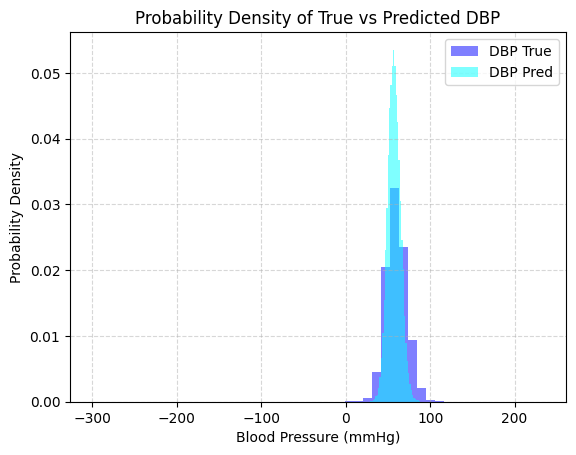

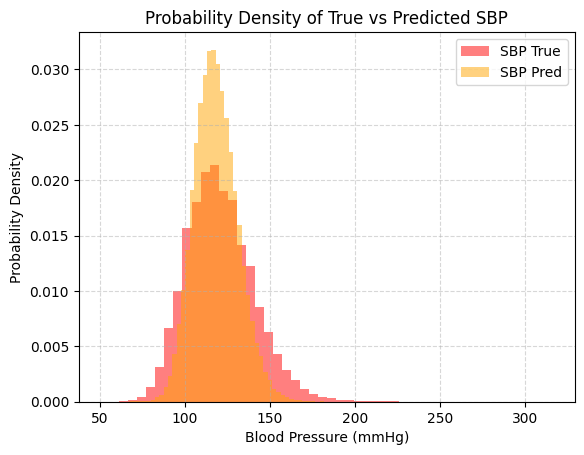

In [6]:
# ============================================================
# IMPORTS
# ============================================================

import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

model.eval()

all_preds = []
all_true = []

# ============================================================
# EVALUATION LOOP
# ============================================================

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)

        with torch.amp.autocast(device_type='cuda'):
            preds = model(x)

        all_preds.append(preds.cpu())
        all_true.append(y.cpu())

all_preds = torch.cat(all_preds, dim=0).numpy()
all_true  = torch.cat(all_true, dim=0).numpy()

sbp_true, dbp_true = all_true[:,0], all_true[:,1]
sbp_pred, dbp_pred = all_preds[:,0], all_preds[:,1]

def compute_metrics(y_true, y_pred):
    errors = y_pred - y_true
    N = len(errors)

    ME = np.mean(errors)
    SDE = np.std(errors, ddof=0)
    MAE = np.mean(np.abs(errors))
    R2 = r2_score(y_true, y_pred)

    return ME, SDE, MAE, R2

sbp_ME, sbp_SDE, sbp_MAE, sbp_R2 = compute_metrics(sbp_true, sbp_pred)
dbp_ME, dbp_SDE, dbp_MAE, dbp_R2 = compute_metrics(dbp_true, dbp_pred)

# ============================================================
# METRICS
# ============================================================

print("SBP Metrics:")
print(f" ME = {sbp_ME:.3f} mmHg")
print(f" SDE = {sbp_SDE:.3f} mmHg")
print(f" MAE = {sbp_MAE:.3f} mmHg")
print(f" R² = {sbp_R2:.3f}")

print("\nDBP Metrics:")
print(f" ME = {dbp_ME:.3f} mmHg")
print(f" SDE = {dbp_SDE:.3f} mmHg")
print(f" MAE = {dbp_MAE:.3f} mmHg")
print(f" R² = {dbp_R2:.3f}")

# ============================================================
# HISTOGRAMS
# ============================================================

plt.figure()
plt.hist(dbp_true, bins=50, density=True, alpha=0.5, label='DBP True', color='blue')
plt.hist(dbp_pred, bins=50, density=True, alpha=0.5, label='DBP Pred', color='cyan')
plt.title('Probability Density of True vs Predicted DBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure()
plt.hist(sbp_true, bins=50, density=True, alpha=0.5, label='SBP True', color='red')
plt.hist(sbp_pred, bins=50, density=True, alpha=0.5, label='SBP Pred', color='orange')
plt.title('Probability Density of True vs Predicted SBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [7]:
# ============================================================
# IMPORTS
# ============================================================

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.amp import autocast, GradScaler

# ============================================================
# DATASET
# ============================================================

class PulseDBDataset(Dataset):
    def __init__(self, ecg, ppg, sbp, dbp, normalize=True):
        self.ecg = torch.tensor(ecg, dtype=torch.float32)
        self.ppg = torch.tensor(ppg, dtype=torch.float32)
        self.sbp = torch.tensor(sbp, dtype=torch.float32)
        self.dbp = torch.tensor(dbp, dtype=torch.float32)

        if normalize:
            self.ecg = (self.ecg - self.ecg.mean()) / (self.ecg.std() + 1e-8)
            self.ppg = (self.ppg - self.ppg.mean()) / (self.ppg.std() + 1e-8)

    def __len__(self):
        return len(self.sbp)

    def __getitem__(self, idx):
        x = torch.stack([self.ecg[idx], self.ppg[idx]], dim=0)
        y = torch.tensor([self.sbp[idx], self.dbp[idx]], dtype=torch.float32)
        return x, y

SBP_Train = ABP_Train.max(axis=1)
DBP_Train = ABP_Train.min(axis=1)

SBP_Test  = ABP_CalBased_Test.max(axis=1)
DBP_Test  = ABP_CalBased_Test.min(axis=1)

train_dataset = PulseDBDataset(ECG_Train, PPG_Train, SBP_Train, DBP_Train)
test_dataset  = PulseDBDataset(ECG_CalBased_Test, PPG_CalBased_Test, SBP_Test, DBP_Test)

batch_size = 256

# ============================================================
# MODEL
# ============================================================

class Transformer_BP(nn.Module):
    def __init__(
        self,
        seq_len=1000,        # <-- adjust to your actual signal length
        d_model=128,
        nhead=4,
        num_layers=4,
        dim_feedforward=256,
        dropout=0.1
    ):
        super().__init__()

        # Project 2-channel input into d_model dimension
        self.input_proj = nn.Conv1d(2, d_model, kernel_size=1)

        # Positional encoding (learnable)
        self.pos_embedding = nn.Parameter(torch.randn(1, d_model, seq_len))

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=False,   # transformer expects (S, B, C)
            norm_first=False
        )
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers,
            enable_nested_tensor=False
        )

        # Final regression head
        self.regressor = nn.Sequential(
            nn.Linear(d_model, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        # -------------------------
        # x shape: (B, 2, L)
        # -------------------------

        x = self.input_proj(x)        # (B, d_model, L)

        # Add positional encoding
        x = x + self.pos_embedding[:, :, :x.size(-1)]

        # Transformer wants (L, B, C)
        x = x.permute(2, 0, 1)

        # Pass through the encoder
        x = self.transformer(x)       # (L, B, d_model)

        # Global average pooling over sequence
        x = x.mean(dim=0)             # (B, d_model)

        # Regress SBP & DBP
        return self.regressor(x)

# ============================================================
# DATALOADERS
# ============================================================

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8,
    pin_memory=True,
    persistent_workers=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
    persistent_workers=True
)

# ============================================================
# MODEL, CRITERION, OPTIMIZER, SCALER, DEVICE
# ============================================================

model = Transformer_BP(seq_len=ECG_Train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scaler = GradScaler(device='cuda')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ============================================================
# TRAINING LOOP
# ============================================================
num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")

    for x, y in train_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)

        with autocast(device_type='cuda'):
            preds = model(x)
            loss = criterion(preds, y)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

    print(f"Epoch {epoch+1} | Train Loss: {running_loss / len(train_loader):.4f}")
# ============================================================
# TESTING LOOP
# ============================================================
model.eval()
test_loss = 0.0

test_pbar = tqdm(test_loader, desc="Testing")

with torch.no_grad():
    for x, y in test_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        with autocast(device_type='cuda'):
            preds = model(x)
            loss = criterion(preds, y)

        test_loss += loss.item()
        test_pbar.set_postfix(loss=f"{loss.item():.4f}")

print(f"Final Test Loss: {test_loss / len(test_loader):.4f}")

Epoch 1/1 Training: 100%|██████████| 1819/1819 [02:53<00:00, 10.45it/s, loss=218.3403]


Epoch 1 | Train Loss: 610.2570


Testing: 100%|██████████| 203/203 [00:07<00:00, 28.91it/s, loss=93.2469]

Final Test Loss: 259.6528


In [1]:
# ============================================================
# IMPORTS
# ============================================================

import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

model.eval()

all_preds = []
all_true = []

# ============================================================
# EVALUATION LOOP
# ============================================================

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)

        with torch.amp.autocast(device_type='cuda'):
            preds = model(x)

        all_preds.append(preds.cpu())
        all_true.append(y.cpu())

all_preds = torch.cat(all_preds, dim=0).numpy()
all_true  = torch.cat(all_true, dim=0).numpy()

sbp_true, dbp_true = all_true[:,0], all_true[:,1]
sbp_pred, dbp_pred = all_preds[:,0], all_preds[:,1]

def compute_metrics(y_true, y_pred):
    errors = y_pred - y_true
    N = len(errors)

    ME = np.mean(errors)
    SDE = np.std(errors, ddof=0)
    MAE = np.mean(np.abs(errors))
    R2 = r2_score(y_true, y_pred)

    return ME, SDE, MAE, R2

sbp_ME, sbp_SDE, sbp_MAE, sbp_R2 = compute_metrics(sbp_true, sbp_pred)
dbp_ME, dbp_SDE, dbp_MAE, dbp_R2 = compute_metrics(dbp_true, dbp_pred)

# ============================================================
# METRICS
# ============================================================

print("SBP Metrics:")
print(f" ME = {sbp_ME:.3f} mmHg")
print(f" SDE = {sbp_SDE:.3f} mmHg")
print(f" MAE = {sbp_MAE:.3f} mmHg")
print(f" R² = {sbp_R2:.3f}")

print("\nDBP Metrics:")
print(f" ME = {dbp_ME:.3f} mmHg")
print(f" SDE = {dbp_SDE:.3f} mmHg")
print(f" MAE = {dbp_MAE:.3f} mmHg")
print(f" R² = {dbp_R2:.3f}")

# ============================================================
# HISTOGRAMS
# ============================================================

plt.figure()
plt.hist(dbp_true, bins=50, density=True, alpha=0.5, label='DBP True', color='blue')
plt.hist(dbp_pred, bins=50, density=True, alpha=0.5, label='DBP Pred', color='cyan')
plt.title('Probability Density of True vs Predicted DBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure()
plt.hist(sbp_true, bins=50, density=True, alpha=0.5, label='SBP True', color='red')
plt.hist(sbp_pred, bins=50, density=True, alpha=0.5, label='SBP Pred', color='orange')
plt.title('Probability Density of True vs Predicted SBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

NameError: name 'model' is not defined

#3. Generative Modeling

Transforming Test ABP: 100%|██████████| 52/52 [00:00<00:00, 225.19it/s]


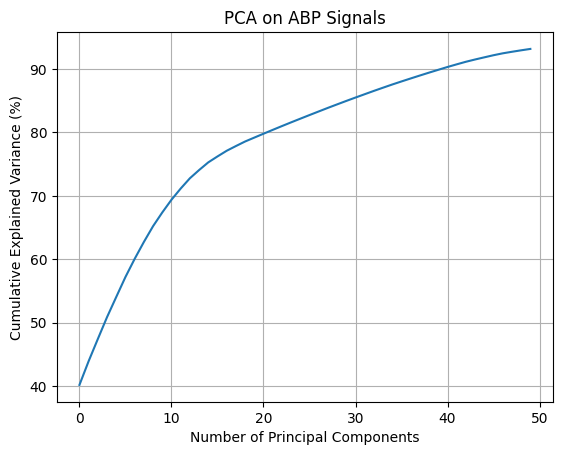

In [7]:
# Compute global mean/std across all train samples and time points
global_mean = ABP_Train.mean()
global_std = ABP_Train.std()

# Normalize
ABP_train_norm = (ABP_Train - global_mean) / global_std
ABP_test_norm  = (ABP_CalBased_Test - global_mean) / global_std

from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

num_samples, signal_length = ABP_train_norm.shape

n_components = 50
batch_size = 1000
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# Loop over batches with a progress bar
num_batches = int(np.ceil(num_samples / batch_size))

for i in tqdm(range(num_batches), desc="Fitting IncrementalPCA"):
    start = i * batch_size
    end = min((i+1) * batch_size, num_samples)
    batch = ABP_train_norm[start:end, :]

    ipca.partial_fit(batch)

# Transform the train set in batches with progress bar
ABP_train_pca = np.zeros((num_samples, n_components))
for i in tqdm(range(num_batches), desc="Transforming Train ABP"):
    start = i * batch_size
    end = min((i+1) * batch_size, num_samples)
    batch = ABP_train_norm[start:end, :]
    ABP_train_pca[start:end, :] = ipca.transform(batch)

# Do the same for the test set
num_test_samples = ABP_test_norm.shape[0]
num_test_batches = int(np.ceil(num_test_samples / batch_size))
ABP_test_pca = np.zeros((num_test_samples, n_components))

for i in tqdm(range(num_test_batches), desc="Transforming Test ABP"):
    start = i * batch_size
    end = min((i+1) * batch_size, num_test_samples)
    batch = ABP_test_norm[start:end, :]
    ABP_test_pca[start:end, :] = ipca.transform(batch)

# Explained variance ratio
explained_variance_ratio = ipca.explained_variance_ratio_

import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.cumsum(explained_variance_ratio)*100)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA on ABP Signals')
plt.grid(True)
plt.show()

In [5]:
# ============================================================
# IMPORTS
# ============================================================

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.amp import autocast, GradScaler

# ============================================================
# DATASET
# ============================================================

class PulseDBDataset(Dataset):
    def __init__(self, ecg, ppg, sbp, dbp, normalize=True):
        self.ecg = torch.tensor(ecg, dtype=torch.float32)
        self.ppg = torch.tensor(ppg, dtype=torch.float32)
        self.sbp = torch.tensor(sbp, dtype=torch.float32)
        self.dbp = torch.tensor(dbp, dtype=torch.float32)

        if normalize:
            self.ecg = (self.ecg - self.ecg.mean()) / (self.ecg.std() + 1e-8)
            self.ppg = (self.ppg - self.ppg.mean()) / (self.ppg.std() + 1e-8)

    def __len__(self):
        return len(self.sbp)

    def __getitem__(self, idx):
        x = torch.stack([self.ecg[idx], self.ppg[idx]], dim=0)
        return x, x

SBP_Train = ABP_Train.max(axis=1)
DBP_Train = ABP_Train.min(axis=1)

SBP_Test  = ABP_CalBased_Test.max(axis=1)
DBP_Test  = ABP_CalBased_Test.min(axis=1)

train_dataset = PulseDBDataset(ECG_Train, PPG_Train, SBP_Train, DBP_Train)
test_dataset  = PulseDBDataset(ECG_CalBased_Test, PPG_CalBased_Test, SBP_Test, DBP_Test)

batch_size = 256

# ============================================================
# MODEL
# ============================================================

class Conv1dAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        # ---------------------------
        # Encoder
        # ---------------------------
        self.encoder = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=7, padding=3),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )

        # ---------------------------
        # Decoder
        # ---------------------------
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(128, 64, kernel_size=2, stride=2, output_padding=1),
            nn.ReLU(),

            nn.ConvTranspose1d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),

            nn.Conv1d(32, 2, kernel_size=3, padding=1),
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

# ============================================================
# DATALOADERS
# ============================================================

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8,
    pin_memory=True,
    persistent_workers=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
    persistent_workers=True
)

# ============================================================
# MODEL, CRITERION, OPTIMIZER, SCALER, DEVICE
# ============================================================

model = Conv1dAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scaler = GradScaler(device='cuda')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ============================================================
# TRAINING LOOP
# ============================================================
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training")

    for x, y in train_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)

        with autocast(device_type='cuda'):
            preds = model(x)
            loss = criterion(preds, y)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

    print(f"Epoch {epoch+1} | Train Loss: {running_loss / len(train_loader):.4f}")
# ============================================================
# TESTING LOOP
# ============================================================
model.eval()
test_loss = 0.0

test_pbar = tqdm(test_loader, desc="Testing")

with torch.no_grad():
    for x, y in test_pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        with autocast(device_type='cuda'):
            preds = model(x)
            loss = criterion(preds, y)

        test_loss += loss.item()
        test_pbar.set_postfix(loss=f"{loss.item():.4f}")

print(f"Final Test Loss: {test_loss / len(test_loader):.4f}")

Epoch 1/20 Training: 100%|██████████| 1819/1819 [00:22<00:00, 81.36it/s, loss=0.0078]


Epoch 1 | Train Loss: 0.0117


Epoch 2/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 93.45it/s, loss=0.0044]


Epoch 2 | Train Loss: 0.0036


Epoch 3/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 94.48it/s, loss=0.0033]


Epoch 3 | Train Loss: 0.0031


Epoch 4/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 92.87it/s, loss=0.0018]


Epoch 4 | Train Loss: 0.0028


Epoch 5/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 93.83it/s, loss=0.0018]


Epoch 5 | Train Loss: 0.0024


Epoch 6/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 93.75it/s, loss=0.0021]


Epoch 6 | Train Loss: 0.0022


Epoch 7/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 94.13it/s, loss=0.0041]


Epoch 7 | Train Loss: 0.0021


Epoch 8/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 93.03it/s, loss=0.0027]


Epoch 8 | Train Loss: 0.0019


Epoch 9/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 92.38it/s, loss=0.0025]


Epoch 9 | Train Loss: 0.0018


Epoch 10/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 92.28it/s, loss=0.0012]


Epoch 10 | Train Loss: 0.0018


Epoch 11/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 92.49it/s, loss=0.0027]


Epoch 11 | Train Loss: 0.0017


Epoch 12/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 93.11it/s, loss=0.0018]


Epoch 12 | Train Loss: 0.0016


Epoch 13/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 87.15it/s, loss=0.0024]


Epoch 13 | Train Loss: 0.0016


Epoch 14/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.45it/s, loss=0.0034]


Epoch 14 | Train Loss: 0.0016


Epoch 15/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.96it/s, loss=0.0020]


Epoch 15 | Train Loss: 0.0016


Epoch 16/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.60it/s, loss=0.0025]


Epoch 16 | Train Loss: 0.0015


Epoch 17/20 Training: 100%|██████████| 1819/1819 [00:20<00:00, 89.76it/s, loss=0.0024]


Epoch 17 | Train Loss: 0.0015


Epoch 18/20 Training: 100%|██████████| 1819/1819 [00:19<00:00, 91.79it/s, loss=0.0022]


Epoch 18 | Train Loss: 0.0015


Epoch 19/20 Training: 100%|██████████| 1819/1819 [00:18<00:00, 97.04it/s, loss=0.0013]


Epoch 19 | Train Loss: 0.0015


Epoch 20/20 Training: 100%|██████████| 1819/1819 [00:18<00:00, 96.44it/s, loss=0.0014]


Epoch 20 | Train Loss: 0.0014


Testing: 100%|██████████| 203/203 [00:01<00:00, 106.83it/s, loss=0.0009]

Final Test Loss: 0.0010


SBP Metrics:
 ME = 0.001 mmHg
 SDE = 0.032 mmHg
 MAE = 0.010 mmHg
 R² = 0.999

DBP Metrics:
 ME = -0.001 mmHg
 SDE = 0.031 mmHg
 MAE = 0.009 mmHg
 R² = 0.999


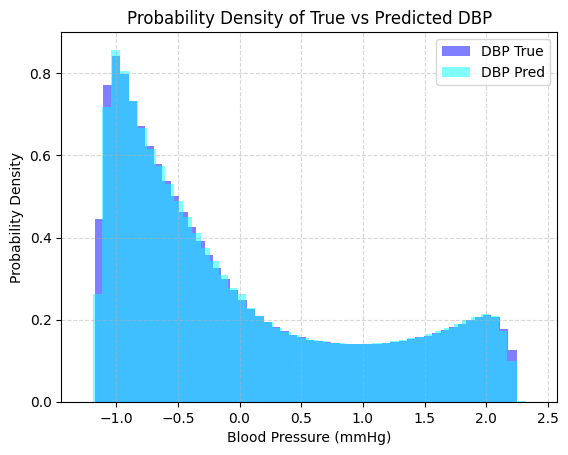

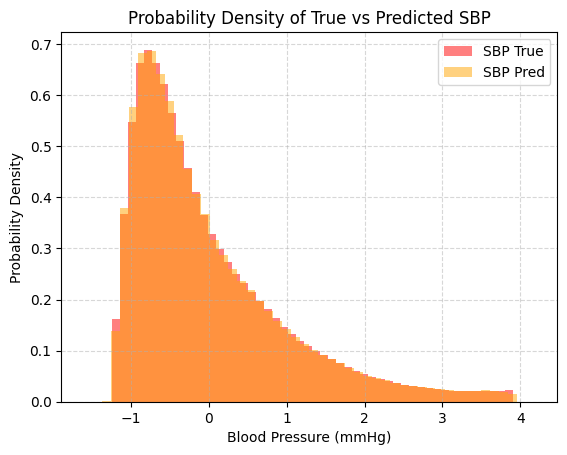

In [19]:
# ============================================================
# IMPORTS
# ============================================================

import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

model.eval()

all_preds = []
all_true = []

# ============================================================
# CRASH PROOFING
# ============================================================

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
    persistent_workers=False
)

# ============================================================
# EVALUATION LOOP
# ============================================================

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)

        with torch.amp.autocast(device_type='cuda'):
            preds = model(x)

        all_preds.append(preds.cpu())
        all_true.append(y.cpu())

all_preds = torch.cat(all_preds, dim=0).numpy()
all_true  = torch.cat(all_true, dim=0).numpy()

sbp_true, dbp_true = all_true[:,0], all_true[:,1]
sbp_pred, dbp_pred = all_preds[:,0], all_preds[:,1]

def compute_metrics(y_true, y_pred):
    errors = y_pred - y_true
    N = len(errors)

    ME = np.mean(errors)
    SDE = np.std(errors, ddof=0)
    MAE = np.mean(np.abs(errors))
    R2 = r2_score(y_true, y_pred)

    return ME, SDE, MAE, R2

sbp_ME, sbp_SDE, sbp_MAE, sbp_R2 = compute_metrics(sbp_true, sbp_pred)
dbp_ME, dbp_SDE, dbp_MAE, dbp_R2 = compute_metrics(dbp_true, dbp_pred)

# ============================================================
# METRICS
# ============================================================

print("SBP Metrics:")
print(f" ME = {sbp_ME:.3f} mmHg")
print(f" SDE = {sbp_SDE:.3f} mmHg")
print(f" MAE = {sbp_MAE:.3f} mmHg")
print(f" R² = {sbp_R2:.3f}")

print("\nDBP Metrics:")
print(f" ME = {dbp_ME:.3f} mmHg")
print(f" SDE = {dbp_SDE:.3f} mmHg")
print(f" MAE = {dbp_MAE:.3f} mmHg")
print(f" R² = {dbp_R2:.3f}")

# ============================================================
# HISTOGRAMS
# ============================================================

plt.figure()
plt.hist(dbp_true.ravel(), bins=50, density=True, alpha=0.5, label='DBP True', color='blue')
plt.hist(dbp_pred.ravel(), bins=50, density=True, alpha=0.5, label='DBP Pred', color='cyan')
plt.title('Probability Density of True vs Predicted DBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure()
plt.hist(sbp_true.ravel(), bins=50, density=True, alpha=0.5, label='SBP True', color='red')
plt.hist(sbp_pred.ravel(), bins=50, density=True, alpha=0.5, label='SBP Pred', color='orange')
plt.title('Probability Density of True vs Predicted SBP')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()